# Partial Dependence Plots¶
http://scikit-learn.org/stable/auto_examples/ensemble/plot_partial_dependence.html

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing


In [6]:
cal_housing = f)

In [7]:
type(cal_housing)

sklearn.utils.Bunch

In [9]:
print(cal_housing.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [10]:
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                   cal_housing.target,
                                                   test_size=0.2, 
                                                   random_state=1)
X_train.shape

(16512, 8)

In [11]:
y_train

array([2.556, 1.146, 1.375, ..., 1.048, 1.407, 1.26 ])

In [12]:
cal_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [13]:
names = cal_housing.feature_names

In [14]:
clf = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                               learning_rate=0.1, loss='huber',
                               random_state=0)
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)

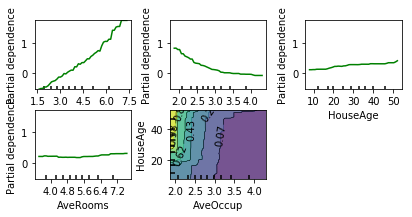

In [15]:
features = [0, 5, 1, 2, (5,1)]
fig, axs = plot_partial_dependence(clf, X_train, features,
                                  feature_names=names,
                                  n_jobs=3, grid_resolution=50)

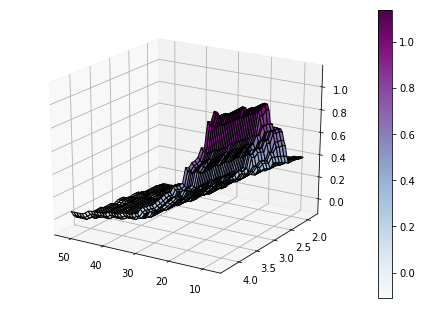

In [20]:
fig = plt.figure()
target_feature = (1, 5)
pdp, axes = partial_dependence(clf, target_feature, 
                              X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
# print(XX, YY)
Z = pdp[0].reshape(list(map(np.size, axes)))
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                      cmap=plt.cm.BuPu, edgecolor="k")
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.subplots_adjust(top=0.9)